# Transfer learning and fine tuning

THe models we are going to train are:
1. Simple CNN
1. inception_resnet_v2

# Steps to create a Machine Learning Model:

1. Import required modules
2. Load data
3. Apply data augmentation and preprocessing
4. Create metrics for model performance
5. Write functions to plot graphs
6. Load and compile model
7. Train, validate and test
8. Save trained model

## 1. Import required modules

In [1]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics
import os
import matplotlib.colors as mcolors

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image


import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image_dataset_from_directory

print("Done importing packages!")

Done importing packages!


## 2. Load data

In [2]:
BATCH_SIZE = 32
IMG_SIZE = (240, 240)

In [3]:
data_dir = "../input/plantvillage-dataset/color"
train_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             label_mode = 'categorical',
                                             validation_split = 0.2,
                                             batch_size=BATCH_SIZE,
                                             seed = 42,
                                             subset = "training",
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             label_mode = 'categorical',
                                             validation_split = 0.2,
                                             batch_size=BATCH_SIZE,
                                             seed = 42,
                                             subset = "validation",
                                             image_size=IMG_SIZE)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [4]:
class_names = train_dataset.class_names
num_classes = len(class_names)
for i in range(1, num_classes + 1):
    print(str(i) + ". ", class_names[i - 1])

1.  Apple___Apple_scab
2.  Apple___Black_rot
3.  Apple___Cedar_apple_rust
4.  Apple___healthy
5.  Blueberry___healthy
6.  Cherry_(including_sour)___Powdery_mildew
7.  Cherry_(including_sour)___healthy
8.  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
9.  Corn_(maize)___Common_rust_
10.  Corn_(maize)___Northern_Leaf_Blight
11.  Corn_(maize)___healthy
12.  Grape___Black_rot
13.  Grape___Esca_(Black_Measles)
14.  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15.  Grape___healthy
16.  Orange___Haunglongbing_(Citrus_greening)
17.  Peach___Bacterial_spot
18.  Peach___healthy
19.  Pepper,_bell___Bacterial_spot
20.  Pepper,_bell___healthy
21.  Potato___Early_blight
22.  Potato___Late_blight
23.  Potato___healthy
24.  Raspberry___healthy
25.  Soybean___healthy
26.  Squash___Powdery_mildew
27.  Strawberry___Leaf_scorch
28.  Strawberry___healthy
29.  Tomato___Bacterial_spot
30.  Tomato___Early_blight
31.  Tomato___Late_blight
32.  Tomato___Leaf_Mold
33.  Tomato___Septoria_leaf_spot
34.  Tomato_

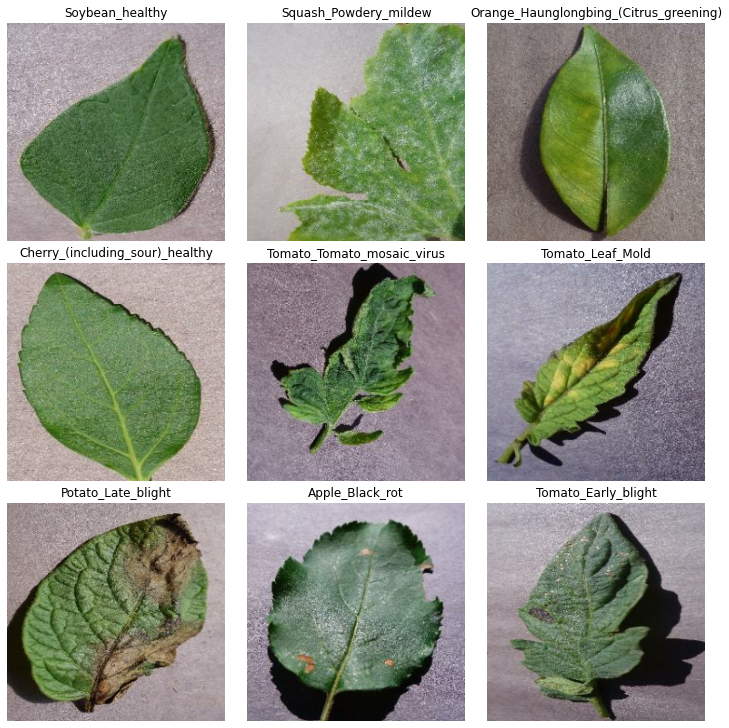

In [5]:
fig = plt.figure(figsize=(10, 10), constrained_layout=True)
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = sub(r"[_]+","_",class_names[np.argmax(labels[i])])
        plt.title(title)
        plt.axis("off")

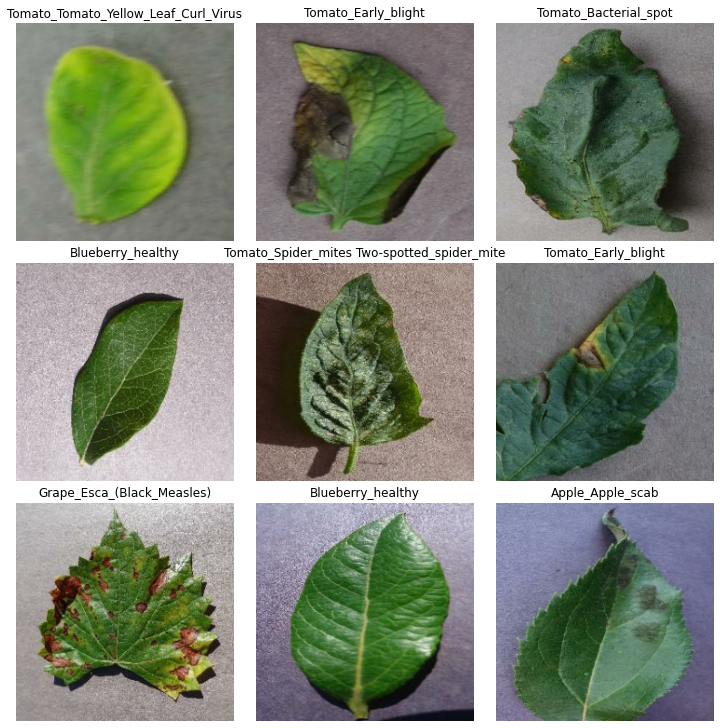

In [6]:
plt.figure(figsize=(10, 10), constrained_layout=True)
for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        title = sub(r"[_]+","_",class_names[np.argmax(labels[i])])
        plt.title(title)
        plt.axis("off")

Simple CNN

In [7]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 272
Number of test batches: 68


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
checkpoint_path = "/kaggle/working"
checkpoint_dir = os.path.dirname(checkpoint_path)

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(240, 240, 3)),
                                    tf.keras.layers.AveragePooling2D(pool_size=2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.GaussianDropout(0.5),
                                     tf.keras.layers.Dense(num_classes,activation='softmax')])

model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.00001)

best_param_model = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, verbose=1, callbacks=[best_param_model])

model.load_weights(checkpoint_path)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Epoch 1/10
1358/1358 [==============================] - 353s 257ms/step - loss: 206.2303 - accuracy: 0.0998 - val_loss: 3.2848 - val_accuracy: 0.1117
Epoch 2/10
1358/1358 [==============================] - 150s 110ms/step - loss: 3.3264 - accuracy: 0.1157 - val_loss: 3.1281 - val_accuracy: 0.1539
Epoch 3/10
1358/1358 [==============================] - 151s 111ms/step - loss: 3.1463 - accuracy: 0.1648 - val_loss: 2.8768 - val_accuracy: 0.2193
Epoch 4/10
1358/1358 [==============================] - 158s 116ms/step - loss: 3.0144 - accuracy: 0.1996 - val_loss: 2.7434 - val_accuracy: 0.2632
Epoch 5/10
1358/1358 [==============================] - 158s 116ms/step - loss: 2.8825 - accuracy: 0.2357 - val_loss: 2.5711 - val_accuracy: 0.3202
Epoch 6/10
1358/1358 [==============================] - 150s 110ms/step - loss: 2.7700 - accuracy: 0.2789 - val_loss: 2.3427 - val_accuracy: 0.3445
Epoch 7/10
1358/1358 [==============================] - 150s 110ms/step - loss: 2.4975 - accuracy: 0.3342 - va

In [10]:
model.trainable=False
model1=tf.keras.models.Sequential(model.layers[:2])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 64)      4864      
_________________________________________________________________
average_pooling2d (AveragePo (None, 120, 120, 64)      0         
Total params: 4,864
Trainable params: 0
Non-trainable params: 4,864
_________________________________________________________________


In [11]:
model2=tf.keras.models.Sequential([model1, tf.keras.layers.Conv2D(128, kernel_size=5, padding='same', activation='relu'),# input_shape=(120, 120, 64)),
                                    tf.keras.layers.AveragePooling2D(pool_size=2),
                                   tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.GaussianDropout(0.5),
                                     tf.keras.layers.Dense(num_classes,activation='softmax')])
model2.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.00001)

best_param_model = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

history2 = model2.fit(train_dataset, epochs=12, validation_data=validation_dataset, verbose=1, callbacks=[best_param_model], initial_epoch=history.epoch[-1])

model2.load_weights(checkpoint_path)
acc+=history2.history['accuracy']
val_acc+=history2.history['val_accuracy']
loss+=history2.history['loss']
val_loss+=history2.history['val_loss']

Epoch 10/12
1358/1358 [==============================] - 897s 658ms/step - loss: 2.3755 - accuracy: 0.3718 - val_loss: 1.2975 - val_accuracy: 0.6175
Epoch 11/12
1358/1358 [==============================] - 891s 656ms/step - loss: 1.2821 - accuracy: 0.6214 - val_loss: 1.1297 - val_accuracy: 0.6606
Epoch 12/12
1358/1358 [==============================] - 893s 657ms/step - loss: 0.9025 - accuracy: 0.7266 - val_loss: 1.1108 - val_accuracy: 0.6625


In [12]:
model2.trainable=False
model3=tf.keras.models.Sequential(model2.layers[:3])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 120, 120, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 128)     204928    
_________________________________________________________________
average_pooling2d_1 (Average (None, 60, 60, 128)       0         
Total params: 209,792
Trainable params: 0
Non-trainable params: 209,792
_________________________________________________________________


In [13]:
model4=tf.keras.models.Sequential([model3, tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),# input_shape=(120, 120, 64)),
                                    tf.keras.layers.AveragePooling2D(pool_size=2),
                                   tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.GaussianDropout(0.5),
                                     tf.keras.layers.Dense(num_classes,activation='softmax')])
model4.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.00001)

best_param_model = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

history4 = model4.fit(train_dataset, epochs=15, validation_data=validation_dataset, verbose=1, callbacks=[best_param_model], initial_epoch=history2.epoch[-1])

model4.load_weights(checkpoint_path)

acc+=history4.history['accuracy']
val_acc+=history4.history['val_accuracy']
loss+=history4.history['loss']
val_loss+=history4.history['val_loss']

Epoch 12/15
1358/1358 [==============================] - 1063s 782ms/step - loss: 2.1032 - accuracy: 0.4279 - val_loss: 1.0298 - val_accuracy: 0.6882
Epoch 13/15
1358/1358 [==============================] - 1060s 780ms/step - loss: 1.1572 - accuracy: 0.6563 - val_loss: 0.8581 - val_accuracy: 0.7336
Epoch 14/15
1358/1358 [==============================] - 1060s 780ms/step - loss: 0.9085 - accuracy: 0.7228 - val_loss: 0.7963 - val_accuracy: 0.7568
Epoch 15/15
1358/1358 [==============================] - 1060s 780ms/step - loss: 0.7357 - accuracy: 0.7730 - val_loss: 0.7849 - val_accuracy: 0.7685


In [14]:
model4.trainable=False
model5=tf.keras.models.Sequential(model4.layers[:3])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 60, 60, 128)       209792    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        204864    
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 64)        0         
Total params: 414,656
Trainable params: 0
Non-trainable params: 414,656
_________________________________________________________________


In [15]:
model6=tf.keras.models.Sequential([model5, tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),# input_shape=(120, 120, 64)),
                                    tf.keras.layers.AveragePooling2D(pool_size=2),
                                   tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.GaussianDropout(0.5),
                                     tf.keras.layers.Dense(num_classes,activation='softmax')])
model6.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.00001)

best_param_model = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

history6 = model6.fit(train_dataset, epochs=20, validation_data=validation_dataset, verbose=1, callbacks=[best_param_model], initial_epoch=history4.epoch[-1])

model6.load_weights(checkpoint_path)


acc+=history6.history['accuracy']
val_acc+=history6.history['val_accuracy']
loss+=history6.history['loss']
val_loss+=history6.history['val_loss']



Epoch 15/20
1358/1358 [==============================] - 1079s 794ms/step - loss: 1.9254 - accuracy: 0.4811 - val_loss: 0.8597 - val_accuracy: 0.7399
Epoch 16/20
1358/1358 [==============================] - 1079s 794ms/step - loss: 1.0855 - accuracy: 0.6757 - val_loss: 0.7498 - val_accuracy: 0.7710
Epoch 17/20
1358/1358 [==============================] - 1079s 794ms/step - loss: 0.9109 - accuracy: 0.7229 - val_loss: 0.6838 - val_accuracy: 0.7880
Epoch 18/20
1358/1358 [==============================] - 1079s 794ms/step - loss: 0.8015 - accuracy: 0.7523 - val_loss: 0.6913 - val_accuracy: 0.7849
Epoch 19/20
1358/1358 [==============================] - 1079s 794ms/step - loss: 0.7101 - accuracy: 0.7739 - val_loss: 0.6623 - val_accuracy: 0.7956
Epoch 20/20
1358/1358 [==============================] - 1081s 795ms/step - loss: 0.6389 - accuracy: 0.7980 - val_loss: 0.6434 - val_accuracy: 0.8009


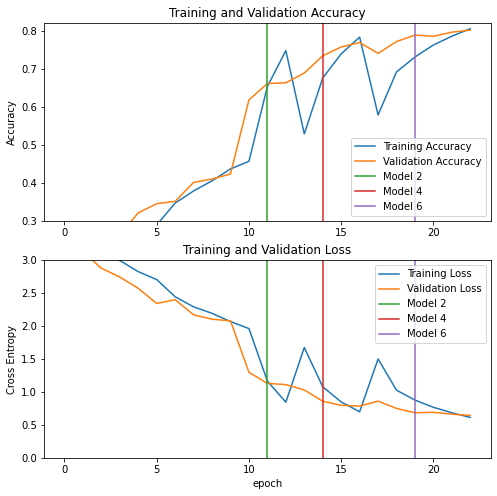

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.3, 0.82])
plt.plot([history2.epoch[-1],history2.epoch[-1]],
          plt.ylim(), label='Model 2')
plt.ylim([0.3, 0.82])
plt.plot([history4.epoch[-1],history4.epoch[-1]],
          plt.ylim(), label='Model 4')
plt.ylim([0.3, 0.82])
plt.plot([history6.epoch[-1],history6.epoch[-1]],
          plt.ylim(), label='Model 6')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 3.0])
plt.plot([history2.epoch[-1],history2.epoch[-1]],
          plt.ylim(), label='Model 2')
plt.ylim([0, 3.0])
plt.plot([history4.epoch[-1],history4.epoch[-1]],
          plt.ylim(), label='Model 4')
plt.ylim([0, 3.0])
plt.plot([history6.epoch[-1],history6.epoch[-1]],
          plt.ylim(), label='Model 6')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.show()

## 3. Data Augmentation and preprocessing